###**SMART QUESTION**

**Problema:** El aumento en el número de cancelaciones de reservas ha afectado negativamente la planificación y los ingresos de los hoteles. Es crucial identificar los factores que influyen en estas cancelaciones para ajustar las políticas de reserva y reducir su impacto. Comprender estos factores permitirá a los hoteles mejorar la gestión y minimizar las pérdidas.

**Justificación** para resolverlo con Ciencia de Datos: Se puede analizar los patrones de cancelación y el tiempo de anticipación de las reservas. Utilizando modelos se pueden predecir las probabilidades de cancelación basadas en las diferentes variables a disposición. Esto permitirá a los hoteles ajustar sus políticas de reservas y estrategias de marketing para reducir las cancelaciones y mejorar la ocupación.

**Pregunta SMART:**¿Cuáles son las variables que muestran una correlación estadísticamente significativa con la tasa de cancelación de reservas en hoteles durante el período del 1 de julio de 2015 al 31 de agosto de 2017, y cómo podemos utilizar esta información para reducir futuras cancelaciones?

**Specific:** Pregunta por variables con correlación respecto a la tasa de cancelación.

**Measurable:** El coeficiente de correlación es una métrica clara.

**Achievable:** Los datos de cancelaciones pueden analizarse estadísticamente.

**Relevant:** La pregunta es relevante para la gestión hotelera, ya que entender esta relación puede ayudar a reducir las cancelaciones y mejorar la planificación y los ingresos.

**Time-bound:** La pregunta está limitada en el tiempo al período del 1 de julio de 2015 hasta el 31 de agosto de 2017.

#PREPARACIÓN

In [101]:
# Importar las librerías
import pandas as pd

import numpy as np

import seaborn as sns
sns.set_theme(style="whitegrid")

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['font.size'] = 4
matplotlib.rcParams['figure.dpi'] = 100

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
# No muestra warnings
import warnings
warnings.filterwarnings("ignore")


In [102]:
file_path = "https://raw.githubusercontent.com/Jcamgom/DatasetHotel/refs/heads/main/hotel_bookings.csv"
df = pd.read_csv(file_path, sep=';',  na_values='?')

In [103]:
df.shape

(119390, 32)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [105]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,1/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,1/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75,0,0,Check-Out,2/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75,0,0,Check-Out,2/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98,0,1,Check-Out,3/07/2015


In [106]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96,0,0,Check-Out,6/09/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225,0,2,Check-Out,7/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,158,0,4,Check-Out,7/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104,0,0,Check-Out,7/09/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151,0,2,Check-Out,7/09/2017


Eliminacion de columnas que no se van a usar

In [107]:
proporcion_nulos = df['company'].isnull().mean()
print(f"Proporción de valores nulos en 'company': {proporcion_nulos}")

Proporción de valores nulos en 'company': 0.943068933746545


In [108]:
# Eliminar la columna 'company' si más del 50% de sus valores son nulos
if df['company'].isnull().mean() > 0.5:
    df = df.drop('company', axis=1)

In [109]:
# Eliminamos las coulumnas que no usamos y que ademas son object

df = df.drop(columns=(['arrival_date_year', 'arrival_date_week_number',
    'arrival_date_day_of_month', 'meal', 'country', 'reserved_room_type', 'assigned_room_type', 'agent', 'reservation_status',
    'reservation_status_date']))

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119386 non-null  float64
 8   babies                          119390 non-null  int64  
 9   market_segment                  119390 non-null  object 
 10  distribution_channel            119390 non-null  object 
 11  is_repeated_guest               119390 non-null  int64  
 12  previous_cancell

###one hot encoding
Convierte las categorías de una columna en múltiples columnas binarias, cada una representando un valor único de la categoría original. En este caso, si aplicamos One Hot Encoding a la columna "hotel", se crearán dos nuevas columnas: una para "city hotel" y otra para "resort hotel".

Cada fila tendrá un valor de 1 en una de estas columnas, indicando a qué tipo de hotel pertenece. Por ejemplo, si la fila 1 tiene un 1 en la columna "city_hotel", significa que esa reserva es de un "city hotel". Esto es útil porque transforma las variables categóricas en variables numéricas, permitiendo que los algoritmos de machine learning trabajen eficientemente con los datos.

In [111]:
df_dum = pd.get_dummies(df, columns=['hotel', 'deposit_type', 'customer_type', 'market_segment',
    'distribution_channel','arrival_date_month'], prefix=['hotel_es','deposit_type_es', 'customer_type', 'market_segment',
    'distribution_channel','arrival_date_month', ])
df_dum.dtypes

,0
is_canceled,int64
lead_time,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64
children,float64
babies,int64
is_repeated_guest,int64
previous_cancellations,int64
previous_bookings_not_canceled,int64


In [112]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   stays_in_weekend_nights         119390 non-null  int64  
 3   stays_in_week_nights            119390 non-null  int64  
 4   adults                          119390 non-null  int64  
 5   children                        119386 non-null  float64
 6   babies                          119390 non-null  int64  
 7   is_repeated_guest               119390 non-null  int64  
 8   previous_cancellations          119390 non-null  int64  
 9   previous_bookings_not_canceled  119390 non-null  int64  
 10  booking_changes                 119390 non-null  int64  
 11  days_in_waiting_list            119390 non-null  int64  
 12  adr             

Al ser 'children' la unica variable con nulos y tipo: float, se procede a analizarlo para saber si se prepara la variable o se elimina.

In [113]:
df_dum['children'].value_counts()

,count
children,
0.0,110796
1.0,4861
2.0,3652
3.0,76
10.0,1


Dado que el 93% de los valores en la columna children son 0.0 (110796 de 119386 filas), la variable no proporciona suficiente variación para ser útil en el análisis. Este dominio casi absoluto del valor 0 sugiere que la presencia de niños en las reservas es un evento raro, lo que limita su impacto predictivo.

In [114]:
df_dum = df_dum.drop(columns=['children'])

In [115]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   is_canceled                     119390 non-null  int64
 1   lead_time                       119390 non-null  int64
 2   stays_in_weekend_nights         119390 non-null  int64
 3   stays_in_week_nights            119390 non-null  int64
 4   adults                          119390 non-null  int64
 5   babies                          119390 non-null  int64
 6   is_repeated_guest               119390 non-null  int64
 7   previous_cancellations          119390 non-null  int64
 8   previous_bookings_not_canceled  119390 non-null  int64
 9   booking_changes                 119390 non-null  int64
 10  days_in_waiting_list            119390 non-null  int64
 11  adr                             119390 non-null  int64
 12  required_car_parking_spaces     119390 non-n

Normalización

In [116]:
# resumir la forma del conjunto de datos
df_dum.shape

(119390, 48)

In [117]:
# resumir cada variable
df_dum.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,0.927599,2.500302,1.856403,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.855072,0.062518,0.571363
std,0.482918,106.863097,0.998613,1.908286,0.579261,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.540938,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000
50%,0.000000,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


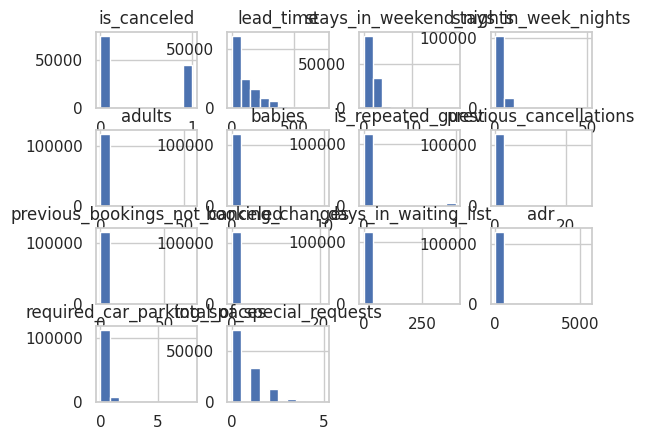

In [118]:
# histogramas de las variables
df_dum.hist()
pyplot.show()

#Modelos

In [162]:
# evaluar knn en el conjunto de datos sin procesar

# load dataset

data = df_dum.values
# separate into input and output columns

X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label

X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

KeyboardInterrupt: 

In [ ]:
# evaluar knn en el conjunto de datos con la transformación del escalador minmax

data = df_dum.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# evaluar knn en el conjunto de datos del sonar con la transformación del escalador estándar
from sklearn.preprocessing import StandardScaler
data = df_dum.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Pipelines

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# scoring data
from sklearn.metrics import accuracy_score

# importing pipes for making the Pipe flow
from sklearn.pipeline import Pipeline

# dataset de prueba

data = df_dum.values
X, y = data[:, :-1], data[:, -1]

# Convert boolean values in y to integers
y = LabelEncoder().fit_transform(y)

#Partimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

# paso 1 PCA, paso 2 escalado, paso 2 clasificación

pipe = Pipeline([('paso_estandarizacion', StandardScaler()), ('paso_decision_tree', DecisionTreeClassifier())], verbose = True)

# fitting los datos en el pipeline

pipe.fit(X_train, y_train)

# mostramos los resultados
print(accuracy_score(y_test, pipe.predict(X_test)))

In [ ]:
pipe = Pipeline([('paso_pca', PCA(n_components = 2)), ('paso_estandarizacion', StandardScaler()),  ('paso_decision_tree', DecisionTreeClassifier())], verbose = True)

# fitting the data in the pipeline
pipe.fit(X_train, y_train)

# scoring data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pipe.predict(X_test)))

In [ ]:
pipe = Pipeline([('paso_decision_tree', DecisionTreeClassifier())], verbose = True)

# fitting the data in the pipeline
pipe.fit(X_train, y_train)

# scoring data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pipe.predict(X_test)))

Pipelines 2

In [ ]:
# Pipeline que selecciona las features y luego entrena un modelo

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


# Seleccion de features y modelos

from pandas import read_csv

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Pipeline y Feature Union

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion


In [ ]:
# Feature union

urlfeatures = []

urlfeatures.append(('pca', PCA(n_components=3)))
urlfeatures.append(('select_best', SelectKBest(k=6)))

feature_union = FeatureUnion(urlfeatures)

print(feature_union)

In [ ]:

# Crear el Pipeline incluyendo la regresión logística

estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression(max_iter=1000)))

model = Pipeline(estimators)

model

In [ ]:
# Prueba del pipeline
seed = 7
varkfold = KFold(n_splits=10)
dataresults = cross_val_score(model, X, y, cv=varkfold)
print(dataresults.mean())


Linear Regression

In [ ]:
# Preprocesado
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

# Machine learning

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Supongamos que ya tienes df_dum, el cual es tu DataFrame preparado

# Convertir el DataFrame a un array de numpy
data = df_dum.values

# Separar las características (X) y la variable objetivo (y)
X, y = data[:, :-1], data[:, -1]

# Convertir valores booleanos en y a enteros (si es necesario)
y = LabelEncoder().fit_transform(y)

# Partir los datos en conjuntos de entrenamiento y prueba (50% para cada uno)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


In [ ]:
# Gráfico de Predicciones vs. Valores Reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Línea diagonal
plt.show()


In [ ]:
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
print("Error cuadrático medio de la validación cruzada: ", -scores.mean())

##Todos los modelos ejecutados dieron resultados positivos.

#ANÁLISIS

Primero visualizamos nuevamente nuestros datos

In [ ]:
df_dum.info()

In [159]:
df_dum.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,0.927599,2.500302,1.856403,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.855072,0.062518,0.571363
std,0.482918,106.863097,0.998613,1.908286,0.579261,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.540938,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000
50%,0.000000,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


Llamamos las columnas(Variables predictoras) para copiarlas en el proximo paso

In [ ]:
print(df_dum.columns)

In [ ]:
# Escojamos nuestras variables predictoras
predictores = ['lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'hotel_es_City Hotel', 'hotel_es_Resort Hotel',
       'deposit_type_es_No Deposit', 'deposit_type_es_Non Refund',
       'deposit_type_es_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'distribution_channel_Corporate',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'arrival_date_month_April', 'arrival_date_month_August',
       'arrival_date_month_December', 'arrival_date_month_February',
       'arrival_date_month_January', 'arrival_date_month_July',
       'arrival_date_month_June', 'arrival_date_month_March',
       'arrival_date_month_May', 'arrival_date_month_November',
       'arrival_date_month_October', 'arrival_date_month_September']
# Escojamos que es lo que queremos encontrar
objetivo = 'is_canceled'
# Recordemos que en nuestra variable Y va lo que queremos encontrar/predecir.
# Mientras en la variable X van las variables que usaremos para encontrar a Y
y = df_dum[objetivo].values
X = df_dum[predictores].values
# Mostrar las dimensiones de X and y para verificar
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

In [ ]:
# Veamos cuántos valores nulos tenemos en cada columna
print("Valores nulos por columna:")
df_dum[predictores + [objetivo]].isna().sum()

Se esta trabajando sin nulos.

In [160]:
# Crear conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(95512, 47)
(23878, 47)
(95512,)
(23878,)


In [161]:
from sklearn.ensemble import (HistGradientBoostingClassifier)
hgbm = HistGradientBoostingClassifier(random_state=42)
hgbm.fit(X_train, y_train)
hgbm.score(X_test, y_test)

KeyboardInterrupt: 

In [ ]:
#Se crea el modelo
log_reg = LogisticRegression(solver='lbfgs',max_iter=4000)
#se entrena el modelo
log_reg.fit(X_train, y_train)

In [ ]:
log_reg.score(X_test, y_test)

El resultado mejoro con la normalización realizada a diferencia del primer taller que su accuracy fue menor.

Se calcula la correlación para saber que columnas serian más interesantes para analizar:

In [ ]:
df_dum.corr()['is_canceled'].nlargest(50)

##Análisis Univariado

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_dum['lead_time'], bins=50, kde=True)
plt.title('Distribución de Lead Time')
plt.xlabel('Lead Time (días)')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de los clientes reservan con una anticipación de entre 0 y 200 días, con algunos valores extremos que llegan hasta 737 días. La distribución muestra una alta variabilidad

In [ ]:
#Lead Time
plt.figure(figsize=(10, 6))
sns.histplot(df_dum['lead_time'][df['lead_time'] <= 50], bins=50, kde=True)
plt.title('Distribución de Lead Time (<= 50 días)')
plt.xlabel('Lead Time (días)')
plt.ylabel('Frecuencia')
plt.show()

Siendo más especificos en el rango se puede observar como la mayoria de personas reserva con muy poca anticipación entre 1 a 20 dias.

In [ ]:
plt.figure(figsize=(10, 6))
data = df_dum['stays_in_week_nights'][df['stays_in_week_nights'] <= 5].value_counts()
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Distribución de Noches entre Semana (<=5)')
plt.legend(data.index, title="Noches", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

La mayoría de los huéspedes se quedan entre 1 y 3 noches entre semana. La distribución indica que las estadías entre semana tienden a ser cortas siendo 1 o 2 noches lo mas elegido de los 5 dias posibles.

In [ ]:
filtered_df = df_dum[df_dum['previous_cancellations'].isin([0, 1])]
plt.figure(figsize=(10, 6))
sns.countplot(x='previous_cancellations', data=filtered_df)
plt.title('Distribución de Cancelaciones Previas')
plt.xlabel('Cancelaciones Previas (0 = No, 1 = Sí)')
plt.ylabel('Frecuencia')
plt.show()

Previemente el porcentaje de cancelaciones era mucho menor.

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_canceled', data=df_dum)
plt.title('Distribución de Cancelaciones')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Frecuencia')
plt.show()

La distribución muestra que aproximadamente el 37% de las reservas fueron canceladas.

##Análisis multivariado

In [ ]:
df_dum.corr()['is_canceled'].nlargest(1000)

En base a la tabla anterior ponemos las variables con mayor correlación para su anlisis en la matriz

In [ ]:
# Seleccionar las variables de interés
variables = [ 'is_canceled',
'deposit_type_es_Non Refund'	,
'lead_time'	,
'market_segment_Groups'	,
'distribution_channel_TA/TO'	,
'hotel_es_City Hotel',
'customer_type_Transient',
'previous_cancellations',
'is_repeated_guest',
'customer_type_Transient-Party'	,
'hotel_es_Resort Hotel'	,
'booking_changes'	,
'distribution_channel_Direct'	,
'market_segment_Direct'	,
'required_car_parking_spaces'	,
'total_of_special_requests'	,
'deposit_type_es_No Deposit'
    ]

df_clean = df_dum[variables].dropna()

# Matriz de correlación
plt.figure(figsize=(14, 12))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 11})
plt.title('Matriz de Correlación')
plt.show()

Teniendo en cuenta la matriz, se analizaran las variables con mayor correlación **Positiva:** deposit_type_es_Non Refund, Lead_time, market_segment_Group y **Negativa:** deposit_type_es_No Deposit, total_of_special_requests, required_car_parking_spaces.

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='deposit_type_es_Non Refund', y='is_canceled', data=df_dum)
plt.title('Depósito No Reembolsable vs Cancelación')
plt.xlabel('Depósito No Reembolsable (0 = No, 1 = Sí)')
plt.ylabel('Tasa de Cancelación (0 = No, 1 = Sí)')
plt.show()



Se esperaria que las personas con deposito No reembolsable tengan menor tasa de cancelación, sin embargo **no es el caso**. Este hallazgo sugiere que los hoteles deberían reevaluar la efectividad de esta política o investigar más a fondo las razones detrás de estas cancelaciones. Este comportamiento puede estar relacionado con factores como la insatisfacción del cliente o la percepción de riesgo, lo que los lleva a cancelar incluso si pierden el depósito.

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=df_dum)
plt.title('Lead Time vs Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Lead Time (días)')
plt.show()

Las reservas con un mayor tiempo de anticipación tienden a tener una mayor probabilidad de cancelación. Esto indica que los clientes que reservan con mayor anticipación son más propensos a cambiar de planes y cancelar.

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='market_segment_Groups', y='is_canceled', data=df_dum)
plt.title('Segmento de Mercado (Grupos) vs Cancelación')
plt.xlabel('Segmento de Mercado (0 = Otros, 1 = Grupos)')
plt.ylabel('Tasa de Cancelación (0 = No, 1 = Sí)')
plt.show()

Este gráfico confirma lo visto en la matriz donde se desmuestra que las reservas de grupos tienen una mayor tasa de cancelación comparado con otros tipos de segmentos de mercado. Esto puede deberse a la complejidad logística que suele acompañar a las reservas de grupo, puesto que suele depender de de mas factores para finalmente concretar la reserva.

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='required_car_parking_spaces', y='is_canceled', data=df_dum)
plt.title('Espacios de Parqueo Requeridos vs Cancelación')
plt.xlabel('Espacios de Parqueo Requeridos')
plt.ylabel('Tasa de Cancelación (0 = No, 1 = Sí)')
plt.show()


Los clientes que requieren más de un espacio de parqueo no cancelan sus reservas. Esto indica que los clientes que solicitan más espacios de parqueo estan más comprometidos con su reserva, posiblemente porque planean un viaje más organizado, lo que disminuye la probabilidad de cancelación.

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='total_of_special_requests', y='is_canceled', data=df_dum, marker='o')
plt.title('Total de Peticiones Especiales vs Cancelación')
plt.xlabel('Total de Peticiones Especiales')
plt.ylabel('Tasa de Cancelación (0 = No, 1 = Sí)')
plt.show()

Entre más requerimientos especiales tengan los clientes, menor sera su tasa de cancelacion. Esto podría deberse a que los clientes que realizan solicitudes adicionales están más interesados en asegurar una experiencia personalizada, lo cual indica un mayor compromiso con la reserva.

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='deposit_type_es_No Deposit', y='is_canceled', data=df_dum)
plt.title('Sin Depósito vs Cancelación')
plt.xlabel('Sin Depósito (0 = No, 1 = Sí)')
plt.ylabel('Tasa de Cancelación (0 = No, 1 = Sí)')
plt.show()

Cuando el cliente no hace deposito, la tasa de cancelación es menor. Es un hallazgo inusual, se esperaria que sin el compromiso de haber hecho un deposito inicial, la gente cancelara con mayor frecuencia.Este resultado puede indicar que los clientes valoran la flexibilidad que ofrece la opción de no hacer un depósito por adelantado, lo que les genera mayor compromiso con la reserva y una menor probabilidad de cancelarla.

In [ ]:

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

###Curva ROC (Receiver Operating Characteristic)
Muestra un área bajo la curva de 0.83, lo que indica una buena capacidad del modelo para distinguir entre reservas canceladas y no canceladas.

#CONCLUSIONES

Teniendo en cuenta la pregunta SMART inicial:

¿Cuáles son las variables que muestran una correlación estadísticamente significativa con la tasa de cancelación de reservas en hoteles durante el período del 1 de julio de 2015 al 31 de agosto de 2017, y cómo podemos utilizar esta información para reducir futuras cancelaciones?

Podemos decir que:

Se identificaron variables con correlación positiva, como deposit_type_es_Non Refund, lead_time, y market_segment_Groups, que sugieren que un mayor depósito no reembolsable, una anticipación de reserva más largo y reservar en grupos pueden estar asociados con un aumento en la probabilidad de cancelación.
Por otro lado, las variables deposit_type_es_No Deposit, total_of_special_requests, y required_car_parking_spaces mostraron correlaciones negativas significativas, indicando que la ausencia de un depósito, un mayor número de requerimientos especiales y la solicitud de más espacios de parqueo están relacionados con una menor tasa de cancelación.

Para reducir futuras cancelaciones se sugiere que:

Investigar a fondo (contactando al cliente) sobre el motivo(s) por el cual se estan efectuando estas cancelaciones, para poder actuar en base a esos nuevos datos.
Enviar recordatorios a los clientes sobre sus reservas a medida que se acerque la fecha, reforzando la importancia de la planificación.
Desarrollar paquetes atractivos y promociones específicas para grupos, incluyendo beneficios adicionales para aumentar el valor percibido de la reserva y que fomenten el compromiso de los grupos.
Promover la opción de realizar peticiones especiales, asegurando que los clientes sepan que el hotel está dispuesto a satisfacer sus necesidades, lo que podría aumentar su compromiso con la reserva.
Campaña de marketing enfocada a público con automoviles a través de correos electrónicos y redes sociales con contenido visual atractivo ofreciendo promociones especiales, como noches gratuitas de estacionamiento o lavado del vehiculo.


###Limitaciones

Aunque se identificaron correlaciones entre algunas variables y la tasa de cancelación, la fuerza de estas correlaciones no fue muy alta. Esto indica que no podemos atribuir las cancelaciones únicamente a estas variables. En un caso real, donde contamos con un dataset fijo, es importante reconocer que los datos disponibles pueden no capturar todos los factores influyentes, pero debemos trabajar con ellos para obtener los mejores resultados posibles. A pesar de estas limitaciones, la información obtenida puede ser útil para tomar decisiones informadas y mitigar las cancelaciones.